In [3]:
import torchvision 
import torch
import torchattacks as tk

In [24]:
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='../Dataset/cifar10', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))]))
testset = torchvision.datasets.CIFAR10(root='../Dataset/cifar10', train=False, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.2010))]))

testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)
idx_class = trainset.classes

Files already downloaded and verified


[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given


In [7]:
import torch.nn as nn
device = torch.device('cpu')
class GaussianNoise(nn.Module):
    """Gaussian noise regularizer.

    Args:
        sigma (float, optional): relative standard deviation used to generate the
            noise. Relative means that it will be multiplied by the magnitude of
            the value your are adding the noise to. This means that sigma can be
            the same regardless of the scale of the vector.
        is_relative_detach (bool, optional): whether to detach the variable before
            computing the scale of the noise. If `False` then the scale of the noise
            won't be seen as a constant but something to optimize: this will bias the
            network to generate vectors with smaller values.
    """

    def __init__(self, sigma=0.1, is_relative_detach=True):
        super().__init__()
        self.sigma = sigma
        self.is_relative_detach = is_relative_detach
        self.noise = torch.tensor(0).to(device)

    def forward(self, x, targets):
        if self.training and self.sigma != 0:
            scale = self.sigma * x.detach() if self.is_relative_detach else self.sigma * x
            sampled_noise = self.noise.repeat(*x.size()).float().normal_() * scale
            x = x + sampled_noise
        return x 

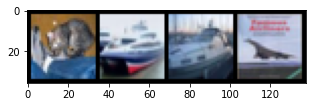

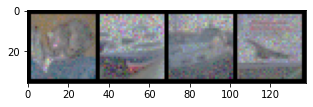

[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99] Cannot assign requested address
on_close() takes 1 positional argument but 3 were given
[Errno 99]

In [27]:
attack = GaussianNoise(sigma=0.5)

imgs,targets = iter(testloader).next()

adv_imgs = attack(imgs, targets)

import matplotlib.pyplot as plt
import numpy as np

def imshow(img, title):
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

imshow(torchvision.utils.make_grid(imgs, normalize=True),'')
imshow(torchvision.utils.make_grid(adv_imgs, normalize=True),'')
